<a href="https://colab.research.google.com/github/michaeljmcardoso/Projeto_Analisando-os-Dados-do-Airbnb_Santiago_Chile/blob/main/Analisando_os_Dados_do_Airbnb_Santiago_Chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg">

# **Análise dos Dados do Airbnb - SANTIAGO**

by Michael J M Cardoso

---

<center><img alt="Analisando Airbnb" width="65%" src="https://img.freepik.com/vetores-premium/horizonte-da-cidade-de-santiago-do-chile-em-um-fundo-branco-ilustracao-em-vetor-plana-conceito-de-viagens-e-turismo-de-negocios-com-edificios-modernos-imagem-para-banner-ou-site_596401-175.jpg?w=2000"></center>

O [Airbnb](https://www.airbnb.com.br/) é uma comunidade baseada no compartilhamento, que tem como missão conectar pessoas que querem se hospedar a turismo ou a trabalho, com anfitriões que desejam alugar seus imóveis, ou apenas quartos. Atualmente existem mais de 6 milhões de acomodações registradas na plataforma do Airbnb, que já é considerado como a **maior empresa hoteleira da atualidade**. O curioso é que ele **não possui nenhum hotel**! Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa. No final de 2018, a Startup fundada há 10 anos, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais. Uma das iniciativas do Airbnb é disponibilizar dados do site para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

---

**Neste *notebook*, o objetivo é analisar os dados referentes à cidade Santiago, Región Metropolitana de Santiago, Chile e ver quais insights podem ser extraídos a partir dos dados brutos.**

<center><img alt="Analisando Airbnb" width="65%" src="https://images.unsplash.com/photo-1557974040-3bec341da09b?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Nnx8c2FudGlhZ28lMjBjaGlsZXxlbnwwfHwwfHw%3D&auto=format&fit=crop&w=700&q=60" "Regiao Metropolitana del Chile"></center>

## **Conhecendo um pouco do Chile e da cidade Santiago**

O Chile é um dos países mais procurados pelos brasileiros que fazem turismo pela América do Sul. Da energia vibrante de Santiago ao impressionante Deserto do Atacama, passando pela Cordilheira dos Andes, não faltam atrações para todo perfil de viajante.

Santiago, capital e maior cidade do Chile, fica em um vale circundado pelos Andes cobertos pela neve e a cadeia de montanhas chilena. A Plaza de Armas, o coração do centro velho colonial da cidade, abriga 2 pontos turísticos históricos neoclássicos: o Palacio de la Real Audiencia de 1808, sede do museu de história nacional, e a catedral metropolitana do século 18. La Chascona é a casa do poeta Pablo Neruda que foi transformada em museu (Google).

Da mesma forma que outras capitais pelo mundo, Santiago é um destino com potencial turístico durante todo o ano. A capital chilena tem atraído cada vez mais turistas ao longo dos anos. Vinícolas, estações de ski, shoppings enormes, ótimos restaurantes, bons hotéis e uma cordilheira imponente ao redor da cidade, a [Cordilheira dos Andes](https://pt.wikipedia.org/wiki/Andes).

Se você está planejando uma viagem rumo ao nosso vizinho sul-americano, deve estar cheio de perguntas na cabeça: do orçamento para as férias ao tipo de moeda que precisará usar durante a viagem, qual a média do preço para hospedagem, qual localidade mais em conta para se hospedar. Existe uma grande variedade de hospedagens no Chile. Isso quer dizer que você deverá encontrar boas alternativas em diversas faixas de preço. 
Partindo de uma análise exploratória dos dados brutos do Airbnb-Santiago, poderemos te ajudar a encontrar algumas dessas respostas.

<center><img alt="Analisando Airbnb" width="50%" src=https://images.unsplash.com/photo-1486312338219-ce68d2c6f44d?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=872&q=80></center>

## **Obtenção dos Dados**
Todos os dados utilizados neste projeto foram coletados a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial utilizaremos apenas o seguinte arquivo:

* `listings.csv` *Summary information and metrics for listings in Santiago (good visualizations).*

Este dataset poderá sofrer atualização. No momento, a ultima compilação foi realizada em 22 September de 2022 e pode ser acessada no link abaixo:

* [dataset](http://data.insideairbnb.com/chile/rm/santiago/2022-09-22/visualisations/listings.csv)



In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px

%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', style='whitegrid')
pallete_color = ['#A3D9FF', '#7E6B8F', '#984447', '#468C98']
pallete_10 = ["#468C98","#9d8df1","#b8cdf8","#95f2d9","#1cfeba","#dcedb9","#d2e59e",
              "#cbd081","#e7ad99","#ce796b"]

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/chile/rm/santiago/2022-09-22/visualisations/listings.csv")

In [3]:
#listar as colunas do DateFrame
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

## **Análise dos Dados**

Nesta etapa o objetivo é criar uma visão geral, com vistas a produzir um entendimento de **como os dados estão estruturados**. Mas antes vamos listar as variáveis que encontraremos neste *dataset*, por meio de um **dicionário de variáveis**. Vejamos.

####**Dicionário das variáveis**:

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada 
* `host_id` - número de id do proprietário
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor
* `neighbourhood` - nome do bairro
* `latitude` - coordenada de latitude da propriedade
* `longitude` - coordenada de longitude da propriedade 
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nigths` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de avaliações que a propriedade possui
* `last_review` - data da última avaliação
* `reviews_per_month` - quantidade de avaliações por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `license` - número de registro

### **Overview do dataset**
Antes de iniciar qualquer análise, faremos uma breve verificação do *dataset*, **analisando as 5 primeiras entradas**. Com o método `.head()` podemos facilmente ter um *overview* de nosso conjunto de dados.

In [4]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,33491101,Casita refugio interior,252327165,Luz,NaN,El Bosque,-33.56362,-70.70975,Private room,30000,1,0,NaN,NaN,2,140,0,NaN
1,41380910,Casa Condominio Piscina Chamisero/8min de Vita...,110039387,Stephanie,NaN,Huechuraba,-33.32342,-70.63119,Entire home/apt,70000,30,4,2021-03-14,0.13,1,52,0,NaN
2,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,49590,3,0,NaN,NaN,1,178,0,NaN
3,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,Entire home/apt,50526,1,46,2021-11-04,0.32,3,0,1,NaN
4,53494,depto centro ski el colorado chile,249097,Paulina,NaN,Lo Barnechea,-33.34344,-70.29432,Entire home/apt,149999,2,38,2021-05-22,0.50,1,356,0,NaN


### **Número de entradas, os tipos e as quantidades das variáveis**

Observando as primeiras entradas já é possível ter noção dos atributos (variáveis) e entradas que nosso conjunto de dados possui. Mas ainda precisamos **verificar o número de entradas, quais os tipos e as quantidades das variáveis**, antes de partirmos para as análises.

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna. Este `dataset` que baixamos é a versão "resumida" do Airbnb que se encontra na mesma página que baixamos o arquivo `listings.csv`. Lá também encontramos uma versão mais completa (listings.csv.gz) com 8574 entradas e 74 variáveis. **A versão resumida que utilizaremos possui 8574 entradas e 18 variáveis**.


In [5]:
# identificar o volume de dados do DataFrame

print("-*-" * 14)
print("Entradas: \t {}".format(df.shape[0]))
print("Variáveis: \t {}\n".format(df.shape[1]))
print("-*-" * 14)

# mostrar o tipo das variáveis
display(df.dtypes)

-*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Entradas: 	 8574
Variáveis: 	 18

-*--*--*--*--*--*--*--*--*--*--*--*--*--*-


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Alterando o data type da coluna price para float**

Vemos que a coluna price (preço) está definida como `int64`, ou seja números inteiros. contudo, tratando-se de dados referentes a um valor monetário (uma medida), é mais conveniente tratá-los como números decimais (`float`). Sendo assim, vamos mudar o tipo da coluna `price` para `float`.

In [6]:
# alterar data type da coluna price para float
df.price = df.price.astype(float)
print(df["price"].dtypes)

float64


### **Porcentagem de valores ausentes no dataset**

Para melhor visualizarmos os dados ausentes, iremos ordenar os valores percentuais em ordem decrescente, utilizando a função `df.sort_values (ascending=False)`.

In [7]:
# ordenar em sentido decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.979123
reviews_per_month                 0.273035
last_review                       0.273035
name                              0.000350
host_name                         0.000117
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Agora que identificamos o volume do Dataframe, vamos verificar a porcentagem dos *missing values* (valores ausentes) no *dataset*. Antes de irmos para o  código é salutar entender alguns motivos típicos de falta de dados: o usuário pode ter esquecido de preencher o campo, ter digitado equivocadamente, ou não quis preencher um campo devido suas crenças, por exemplo, e até mesmo um erro de programção durante a transferência dos dados.

É necessário, portanto, entendermos esses dados ausentes do ponto de vista estatístico, pois a qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. Assim, buscaremos entender logo de início se esses valores nulos são significativos quando comparados ao total de entradas e com nossos objetivos.

Observações:

* É possível ver que as colunas `neighbourhood_group` e `license` possuem praticamente 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 27% das linhas.
* As variáveis `name` e `host_name` têm aproximadamente menos de 1% dos valores nulos.

Assim, notamos que as colunas em destaque com valores faltantes serão irrelevantes para nossa análise inicial. Pois a coluna `neighbourhood_group`, referindo-se a um tipo de zoneamento de bairros ou distrito e estando totalmente vazia, não se mostrou relevante uma vez que, a coluna seguinte, `neighbourhood`(bairro), que está quase totalmente preenchida, poderia ser utilizada caso desejássemos trabalhar com esse atributo em nossas análises.

Do mesmo modo, as colunas `reviews_per_month`, `last_review` (avaliações por mês e última avaliação) e `license`, também não se mostraram relevantes para nosso objetivo.

Nas colunas `name` e `host_name`(nome e sobrenome) foram encontradas poucas entradas vazias. Neste caso, optaremos por excluir apenas tais entradas, não a coluna inteira.

#### **Exclusão das colunas com dados ausentes e de linhas com entradas faltantes**

In [8]:
df_clean = df.copy()

In [9]:
# Excluindo colunas com dados ausentes
df_clean.drop(columns=['neighbourhood_group', 'license', 'reviews_per_month', 'last_review'], inplace=True)

In [10]:
# Excluindo linhas com entradas faltantes
df_clean.dropna(axis=0, inplace=True)

In [11]:
# Confirmando a exclusão das entradas ausentes
(df_clean.isnull().sum()).sort_values(ascending=False)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Agora, após o tratamento das entradas faltantes, é interessante questionarmos qual o tipo de distribuição das variáveis. Para identificar e melhor visualizar a distribuição das variáveis, iremos plotar um histograma.

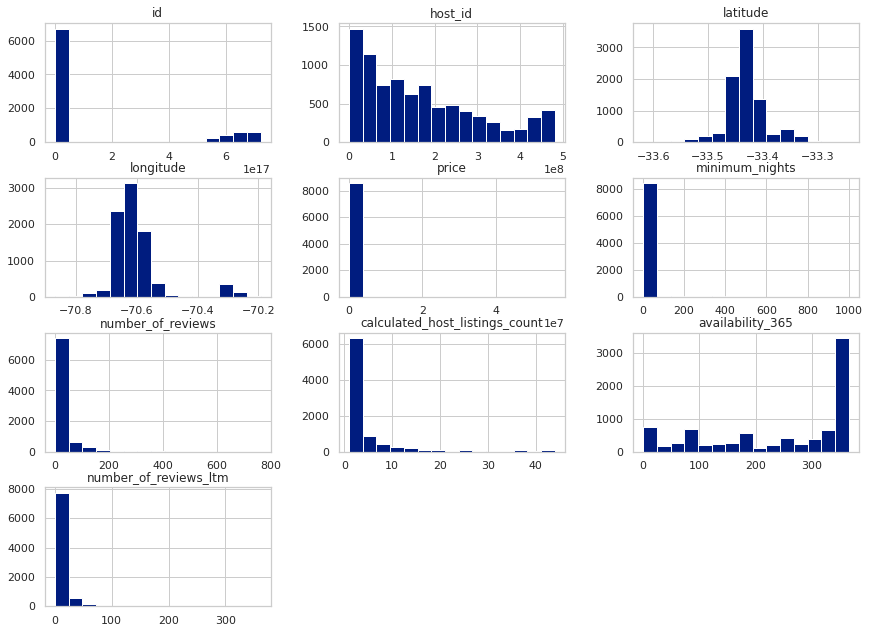

In [12]:
# plotar o histograma das variáveis numéricas
df_clean.hist(bins=15 , figsize=(13, 10));

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Basicamente, um *outlier* é um dado que se encontra fora do padrão geral de uma distribuição. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`: os valores não seguem uma distruição, e distorcem toda a representação gráfica.

Olhando o resumo estatístico abaixo, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 6544.8.
* A quantidade mínima de noites (`minimum_nights`) está com quantidade máxima acima de 365 dias no ano.

In [13]:
# ver o resumo estatístico das variáveis númericas price e minimun_nigths
df_clean[['price', 'minimum_nights']].describe().round(1)

,price,minimum_nights
count,8570.0,8570.0
mean,91330.9,7.5
std,823860.2,30.5
min,6830.0,1.0
25%,28000.0,1.0
50%,42000.0,2.0
75%,65444.8,3.0
max,56139749.0,1000.0


#### **Limpeza dos dados: Tratando os Outliers**

Plotamos o histograma e vimos o resumo estatístisto das variáveis númericas `price` e `minimun_nigths` por meio do método `describe()`.

A partir de agora iremos tratar os *outliers* de nosso conjunto de dados, calcularemos os limites utilizando a regra do IQR Score (Variação Interquartil).

Segundo essa regra, para encontrar o valor base para os outliers de baixo, você pega o valor do primeiro quartil (Q1) e diminui pelo valor do IQR multiplicado por 1,5.

Ou seja, outliers baixos estão abaixo de Q1​ − (1,5 * IQR). Já para os *outliers* de cima, você deve somar o terceiro quartil (Q3) com o produto da mesma multiplicação anterior. Outliers de cima passam de Q3 + (1,5 * IQR). 
​

Basicamente o IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

IQR = Q3 - Q1

<p align="center"><img src="https://assets.datacamp.com/production/repositories/5758/datasets/ca7e6e1832be7ec1842f62891815a9b0488efa83/Screen%20Shot%202020-04-28%20at%2010.04.54%20AM.png
", width="60%"></p>

Agora vamos:

* Definir o Q1 e Q3 para as variáveis que serão limpas.

* Calcular o IQR para as variáveis.

* Definir o limite superior e inferior para cortar os outliers.

* Remover os outliers.

##### **Cálculando o IQR da variável `price`**

In [14]:
# identificação dos outliers da variável price
q1_price = df_clean.price.quantile(.25)
q3_price = df_clean.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price:', IQR_price)

# definição dos limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print("Limite superior de price:", sup_price)
print("Limite inferior de price:", inf_price)

IQR da variável price: 37444.75
Limite superior de price: 121611.875
Limite inferior de price: -28167.125


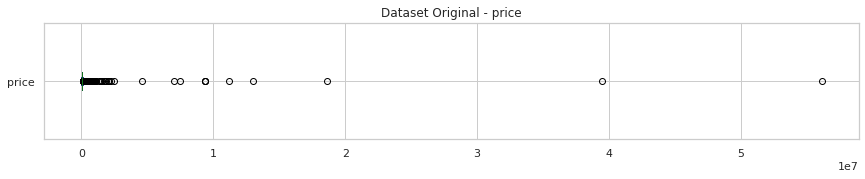

O dataset possui 8570 colunas
898 Entradas acima de 121611.875
Representam 10.48% do dataset


In [15]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(13,2))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df_clean.shape[0]))
print("{} Entradas acima de 121611.875".format(len(df_clean[df_clean.price > 121611.875])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.price > 121611.875]) / df_clean.shape[0])*100))

##### **Cálculo do IQR Variável da `minimum_nights`**

In [16]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df_clean.minimum_nights.quantile(.25)
q3_minimum_nights = df_clean.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  2.0
Limite superior de minimum_nights:  6.0
Limite inferior de minimum_nights:  -2.0


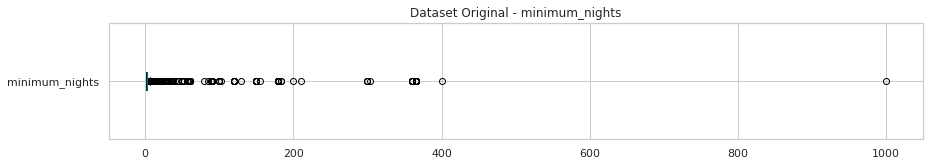

O dataset possui 8570 colunas
1201 Entradas acima de 6.0
Representam 14.01% do dataset


In [17]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(13,2))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df_clean.shape[0]))
print("{} Entradas acima de 6.0".format(len(df_clean[df_clean.minimum_nights > 6.0])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.minimum_nights > 6.0]) / df_clean.shape[0])*100))

In [18]:
# limpando o dataset
df_limpo = df_clean.copy()

df_limpo.drop(df_limpo[df_limpo.price > 121611.875].index, axis=0, inplace=True)
df_limpo.drop(df_limpo[df_limpo.minimum_nights > 6.0].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df_clean.shape)
print('Shape após a limpeza: ',df_limpo.shape)

Shape antes da limpeza:  (8570, 14)
Shape após a limpeza:  (6612, 14)


##### **Comparando os *dataset* da variável price**

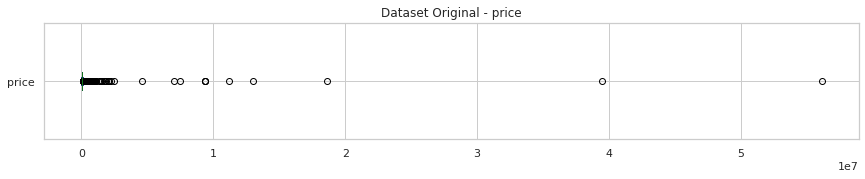

O dataset possui 8570 colunas
898 Entradas acima de 121611.875
Representam 10.48% do dataset


In [19]:
# plotando o bloxpot original da variável price
fig, ax = plt.subplots(figsize=(13,2))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df_clean.shape[0]))
print("{} Entradas acima de 121611.875".format(len(df_clean[df_clean.price > 121611.875])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.price > 121611.875]) / df_clean.shape[0])*100))


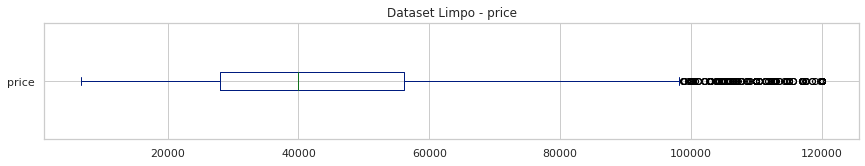

O dataset possui 6612 colunas
0 Entradas acima de 121611.875
Representam 0.00% do dataset


In [20]:
# plotando o bloxpot limpo da variável price
fig, ax = plt.subplots(figsize=(13,2))
df_limpo.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("O dataset possui {} colunas".format(df_limpo.shape[0]))
print("{} Entradas acima de 121611.875".format(len(df_limpo[df_limpo.price > 121611.875])))
print("Representam {:.2f}% do dataset".format((len(df_limpo[df_limpo.price > 121611.875]) / df_limpo.shape[0])*100))

##### **Comparando os *dataset* da variável minimum_nights**

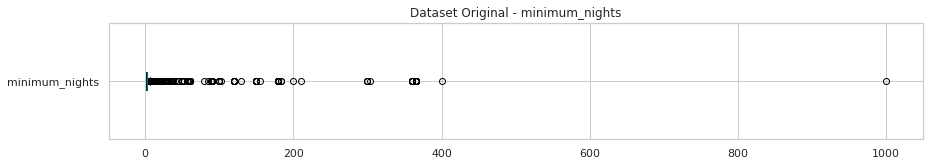

O dataset possui 8570 colunas
1201 Entradas acima de 6.0
Representam 14.01% do dataset


In [21]:
# plotando o bloxpot original da variável minimum_nigths
fig, ax = plt.subplots(figsize=(13,2))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df_clean.shape[0]))
print("{} Entradas acima de 6.0".format(len(df_clean[df_clean.minimum_nights > 6.0])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.minimum_nights > 6.0]) / df_clean.shape[0])*100))

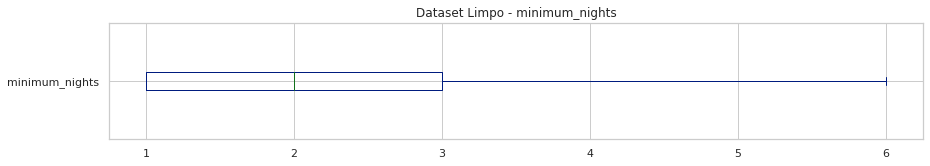

O dataset possui 6612 colunas
0 Entradas acima de 6.0
Representam 0.00% do dataset


In [22]:
# plotando o bloxpot limpo da variável minimum_nigths
fig, ax = plt.subplots(figsize=(13,2))
df_limpo.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df_limpo.shape[0]))
print("{} Entradas acima de 6.0".format(len(df_limpo[df_limpo.minimum_nights > 6.0])))
print("Representam {:.2f}% do dataset".format((len(df_limpo[df_limpo.minimum_nights > 6.0]) / df_limpo.shape[0])*100))

##### **Distribuição das variáveis dos dados limpos**

Para garantirmos que não há mais *outliers* que possam prejudicar nossas análises, vamos checar a distribuição das variáveis novamente.

* Histograma
* Distribuição Estátistica

Aqui podemos ver o resultado da limpeza.


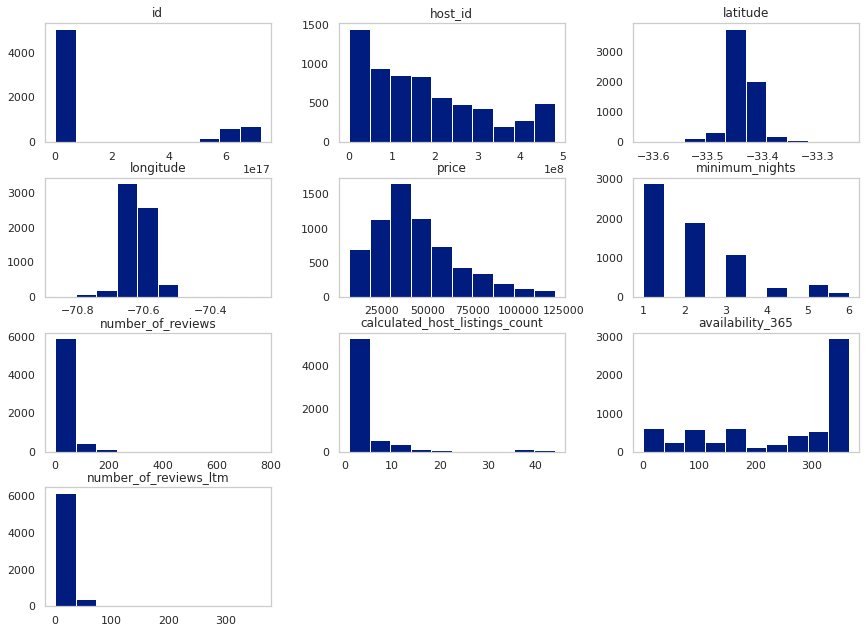

In [23]:
# verificando as distribuições
df_limpo.hist(figsize=(13,10), grid=False);

In [24]:
# Verificando as distribuições estatísticas dos dados limpos para as variáveis price e minimum nigths
df_limpo[['price','minimum_nights']].describe().round(1)

,price,minimum_nights
count,6612.0,6612.0
mean,44204.3,2.0
std,23082.6,1.2
min,6830.0,1.0
25%,28000.0,1.0
50%,40000.0,2.0
75%,56140.0,3.0
max,120000.0,6.0


Agora conseguimos ter uma ideia bem melhor da distribuição dos nossos dados.

Alguns destaques:

* A mediana da variável `price` foi pouquíssimo afetada pela limpeza dos outliers, mostrando mais uma vez a robustez desse atributo como solução para dados ausentes.
* Agora, temos dados que respeitam as regras definidas no início do notebook, onde vimos o que são bons dados.
* A média da variável `price` foi reduzida drásticamente, enfatizando a sensibilidade desse atributo em relação aos outliers.

## **Agora, partindo de nosso conjunto de dados, que tal fazermos algumas análises?**

###**Qual a média de preço de aluguel para hospedagem?**

Se você já viajou ou está pensando em viajar para outra cidade, certamente  vai querer saber qual o valor da hospedagem nesse local, para saber quanto você vai gastar. Em nosso caso, tendo em mãos os dados do Airbnb, queremos descobrir qual o preço médio dos aluguéis de hospedagem na cidade de Santiago do Chile. Lembrando que os dados de nosso *dataset*, referentes ao preço, estão em sempre moeda local, nesse contexto Pesos Chilenos (CLP).

<center><img alt="Analisando Airbnb" width="25%" src="https://likechile.com/wp-content/uploads/2019/03/notas-no-chile-peso-chilenos-e1587653222557.jpg"></center>

<center>fonte: likechile.com</center>

Para descobrirmos o valor médio dos preços de alguel devemos acessar a coluna `price` de nosso *dataset*, obter todos os valores e deles extrair uma média. Assim, descobrimos que o preço médio do aluguel de hospedagem na cidade de Santiago del Chile foi de 44204 pesos chilenos, que equivale em cotação atual a 248,50 reais. Em cotação atual um (1) CLP está custando cerca de R$ 0,005, ou seja, meio centavo de real. Sabendo que a moeda do país vizinho é muito desvalorizada em relação ao real brasileiro, pode valer muito a pena para o turista do Brasil visitar o Chile.

In [25]:
# imprimir a média dos preços do aluguel
print("A média do preço do aluguel de hospedagem foi de {:.0f} pesos chilenos.".format(df_limpo.price.mean()))

A média do preço do aluguel de hospedagem foi de 44204 pesos chilenos.


### **Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis. Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vamos:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

,price,minimum_nights,number_of_reviews,availability_365
price,1.000000,0.035649,-0.013325,0.113167
minimum_nights,0.035649,1.000000,0.002469,-0.173811
number_of_reviews,-0.013325,0.002469,1.000000,-0.078143
availability_365,0.113167,-0.173811,-0.078143,1.000000


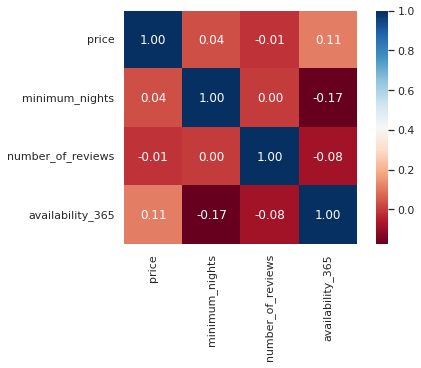

In [26]:
# criar uma matriz de correlação
corr = df_limpo[['price', 'minimum_nights', 'number_of_reviews',
    'availability_365']].corr()

display(corr)

# plotar um mapa de calor
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True); 

### **Qual o tipo de imóvel mais alugado no Airbnb?**

<center><img alt="Analisando Airbnb" width="35%" src="https://static.wixstatic.com/media/f8eb08_b5cc7a796a294f07adffc32321f89910~mv2.jpg/v1/fill/w_640,h_360,al_c,q_80,usm_0.66_1.00_0.01,enc_auto/f8eb08_b5cc7a796a294f07adffc32321f89910~mv2.jpg"></center>

<center>fonte: Beehost</center>



O tipo de imóvel mais alugado no Airbnb foi o Entire home/apt (Casa inteira), com 3981, que corresponde a 60% das locações no período. E o segundo, Private room (quarto privativo), com 2453 (37%).

In [27]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_limpo.room_type.value_counts()

Entire home/apt    3981
Private room       2453
Shared room         128
Hotel room           50
Name: room_type, dtype: int64

In [28]:
# mostrar a porcentagem de cada tipo de imóvel disponível
round(df_limpo.room_type.value_counts() / df_limpo.room_type.shape[0]*100,2)

Entire home/apt    60.21
Private room       37.10
Shared room         1.94
Hotel room          0.76
Name: room_type, dtype: float64

#### **Alguns destaques**

* **60%** dos imóveis são casa inteira
* **37%** são de quartos privados
* **1,94%** são de quartos compartilhados
* Apenas **0,76%** são de quartos de hotéis

#### **Plotando um gráfico de barras para visualizar nossos dados.**

In [29]:
# gráfico do tipo de imóvel mais alugado
fig = px.histogram(df_limpo, x='room_type', opacity=0.9, nbins=4,
                   color_discrete_sequence=[pallete_10[9]],
                   histfunc='count', template='plotly_white', labels={'room_type':'Tipos de Imóveis'})

fig.add_annotation(text='60,21%', x=0, y=3981, showarrow=False, 
                   font_size=20, font_family='monospace', opacity=0.7)
fig.add_annotation(text='37,10%', x=1, y=2453, showarrow=False,
                   font_size=20, font_family='monospace', opacity=0.7)
fig.add_annotation(text='1,94%', x=2, y=128, showarrow=False,
                   font_size=20, font_family='monospace', opacity=0.7)
fig.add_annotation(text='0,76%', x=3, y=50, showarrow=False,
                   font_size=20, font_family='monospace', opacity=0.7)

fig.update_yaxes(showgrid=False)
fig.update_xaxes(showgrid=False)
fig.update_xaxes(categoryorder='total descending')

fig.update_layout(title=dict(text='Tipo de imóvel mais alugado', x=0.5, y=0.95),
                  font_family='monospace', yaxis_title_text='')

fig.show()

### **Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação. Vemos que a localidade mais cara foi o bairro Lo Espejo.


In [47]:
# ver média de preços para as 10 regiões com alguel mais caro
preco_medio = round(df_limpo.groupby(['neighbourhood']).price.mean().sort_values(ascending=False))[:10]

preco_medio

neighbourhood
Lo Espejo       92673.0
Lo Barnechea    67161.0
Vitacura        61507.0
Las Condes      56908.0
Providencia     49106.0
Renca           45634.0
Quilicura       43041.0
Pudahuel        42597.0
Huechuraba      40997.0
Santiago        39341.0
Name: price, dtype: float64

#### **Plotando um gráfico de barras para as 10 regiões com alguel mais caras do nosso *dataset*.**

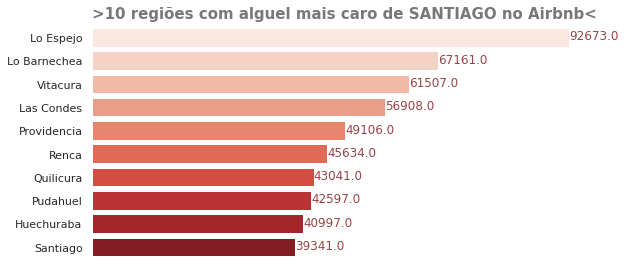

In [73]:
# Criando variável para receber as regiões
regioes = preco_medio.index.to_list()

# Criando variável para receber os percentuais por regiões
percentual_por_regioes = preco_medio.to_list()

# Criado figure para o gráfico de barras
fig, ax = plt.subplots(figsize=(8, 4))

# Escolhendo tema do Seaborn
sns.set_theme(style="whitegrid")

# Plot do gráfico de barras com o Seaborn
sns.barplot(
            x = percentual_por_regioes, 
            y = regioes, 
            palette="Reds")

# Excluindo grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Excluindo eixo y
plt.gca().axes.get_xaxis().set_visible(False)

# Excluindo xticks do eixo x
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True) 

# Colocando os valores ao lado das barras
for i, v in enumerate(percentual_por_regioes):
    ax.text(v + 1, i + 0.1, str(v), color = '#984447')

# Inserindo título do gráfico
plt.text(0, -0.8, '>10 regiões com alguel mais caro de SANTIAGO no Airbnb<',
         fontsize=15, 
         color='#787878',
         weight='bold')

plt.show()


### **Quais localidades com mais ofertas?**

In [48]:
# ver a quantidade de entradas para cada bairro
df_limpo.neighbourhood.value_counts()

Santiago               2415
Providencia            1377
Las Condes             1063
Ñuñoa                   466
Vitacura                168
Recoleta                159
Estación Central        110
San Miguel               98
La Florida               95
Lo Barnechea             88
Macul                    87
La Reina                 80
Maipú                    64
Peñalolén                52
Pudahuel                 47
Independencia            36
Huechuraba               31
La Cisterna              31
San Joaquín              30
Quilicura                27
Quinta Normal            27
La Pintana               11
Renca                     9
El Bosque                 9
Cerrillos                 8
La Granja                 6
Pedro Aguirre Cerda       5
Conchalí                  5
Lo Prado                  4
Cerro Navia               2
Lo Espejo                 1
San Ramón                 1
Name: neighbourhood, dtype: int64

In [49]:
# recorte: ver a quantidade de entradas para os 10 localidades com mais ofertas
df_limpo.neighbourhood.value_counts() [:10]

Santiago            2415
Providencia         1377
Las Condes          1063
Ñuñoa                466
Vitacura             168
Recoleta             159
Estación Central     110
San Miguel            98
La Florida            95
Lo Barnechea          88
Name: neighbourhood, dtype: int64

#### **Plotando gráfico de setores para bairros com maior concentração de ofertas**

In [33]:
# plotar bairros com maior concentração de ofertas
fig = px.pie(df_limpo, values= df_limpo['neighbourhood'].value_counts().sort_values(ascending=False)[:10],
             names=['Santiago', 'Providencia', 'Las Condes', 'Ñuñoa', 'Vitacura', 
                    'Recoleta', 'Estación Central', 'San Miguel', 'La Florida', 'Lo Barnechea'],
            hole=0.5, color_discrete_sequence=pallete_10)

fig.add_annotation(text='10 localidades com<br> mais ofertas', x=0.5, y=0.5, showarrow=False,
                   font_size=14, font_family='monospace', opacity=0.8)
fig.show()

### **Disposição dos imóveis pela latitude-longitude**

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

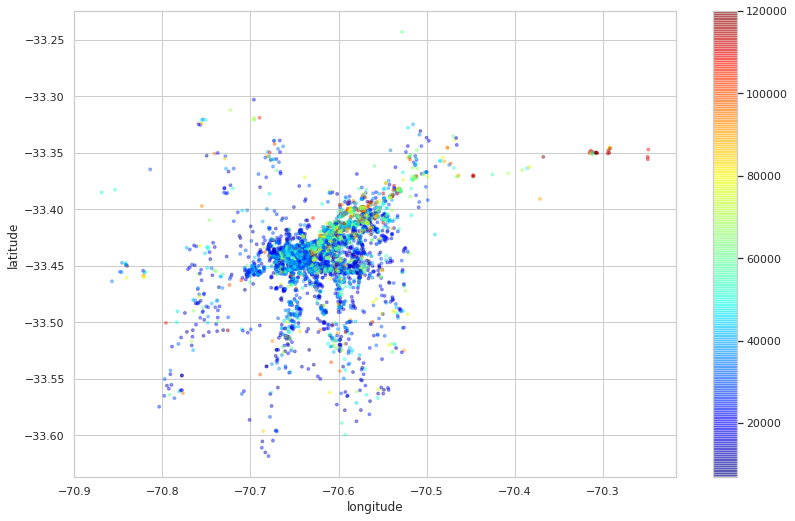

In [34]:
# plotar os imóveis pela latitude-longitude
df_limpo.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_limpo['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [35]:
# ver a média da coluna `minimum_nights`
df_limpo.minimum_nights.mean()

2.026467029643073

Em média, o mínimo de noites para aluguel foi de (2) duas noites.

# **Conclusões**

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis, o que poderia distorcer as informações estatísticas de alguns atributos. Como por exemplo a média do valor dos aluguéis. Contudo, após tratamento e limpeza, pudemos obter dados bem precisos.

Conseguimos identificar:

* **o valor médio do aluguel para hospedagem**
* **as localidades com valor mais caro**
* **a média mínima de noites**
* **o tipo de imóvel mais alugado pelo Airbnb**
* **as regigões com mais ofertas**
* **a disposição dos imóveis no mapa pela latitude-longitude**

Por fim, lembramos que este *dataset* é uma versão resumida, útil para realizarmos uma abordagem inicial. Assim, acreditamos que para uma análise exploratória mais aprofundada, deve-se utilizar o conjunto de dados completos, com um número maior de atributos disponíveis.